In [36]:
import numpy as np
import linecache
import matplotlib.pyplot as plt
from linecache import getline
import matplotlib as mpl

import warnings
warnings.filterwarnings("ignore")

In [57]:
path = "./Data/4238_473356_M-34-89-D-b-4-3.asc"

header = [getline(path, i) for i in np.arange(1, 7)]
values = [float(h.split(" ")[-1].strip()) for h in header]
cols, rows, lx, ly, cell, nd = values
res    = cell
arr_dem = np.loadtxt(path, skiprows=6)
arr_dem[arr_dem<=nd] = np.nan

lons   = lx + np.arange(cols)*res
lats_r = ly + np.arange(rows)*res
lats   = lats_r[::-1] # keep in mind to flip up-down latitude.

Text(0.5, 1.0, 'Digital earth model')

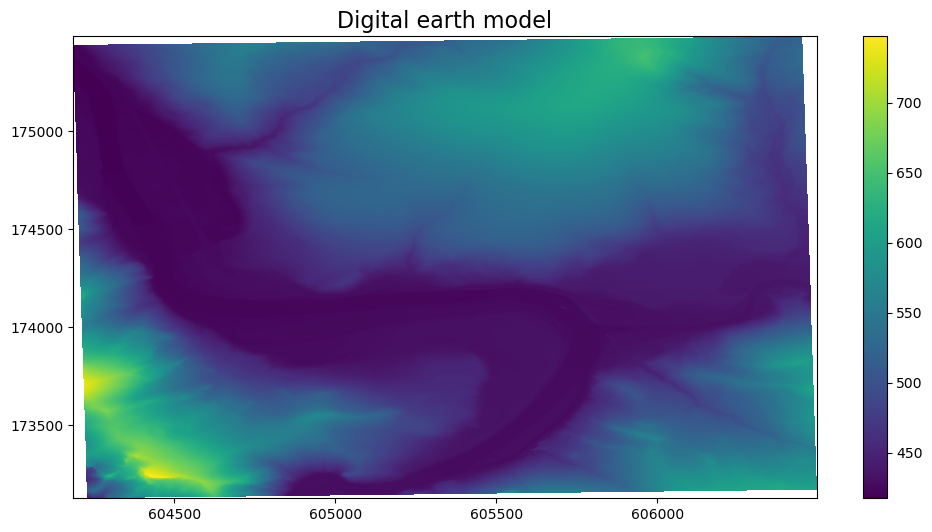

In [58]:
fig, ax = plt.subplots(figsize=(12, 6))

img = ax.pcolormesh(lons, lats, arr_dem, cmap="viridis")
fig.colorbar(img)

ax.set_title('Digital earth model', fontsize=16)


In [71]:
maxHigh = np.nanmax(arr_dem)
minHigh = np.nanmin(arr_dem)
print(maxHigh)
print(minHigh)

747.62
417.6


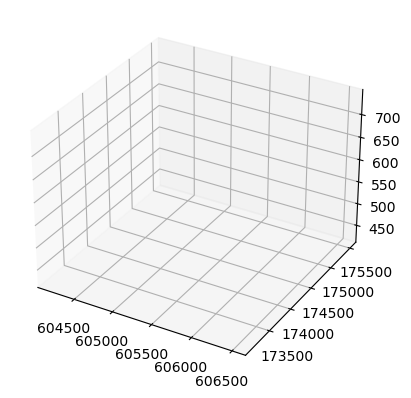

In [41]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

ax.plot_surface(lons, lats, arr_dem, vmin=arr_dem.min() * 2)


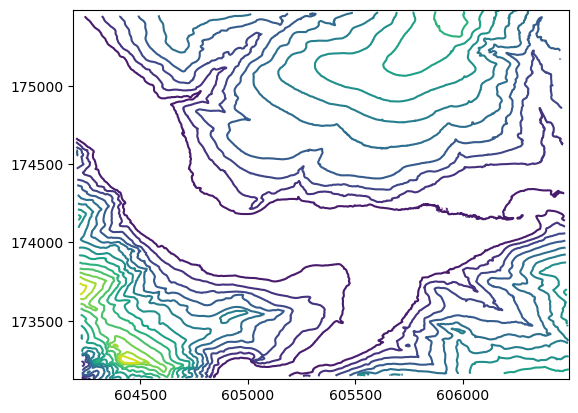

In [72]:
levels = np.linspace(minHigh, maxHigh, 15)

fig, ax = plt.subplots()

ax.contour(lons, lats, arr_dem, levels=levels)